In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt

from subprocess import check_output
df = pd.read_csv("winequality-red.csv")
df.head(3)

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5

In [2]:
data = df.values
X = data[:, 0:]  # all rows, no label
y = data[:, -1:]  # all rows, label only
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
X_train[:3]

array([[11.7    ,  0.49   ,  0.49   ,  2.2    ,  0.083  ,  5.     ,
        15.     ,  1.     ,  3.19   ,  0.43   ,  9.2    ,  5.     ],
       [ 8.8    ,  0.6    ,  0.29   ,  2.2    ,  0.098  ,  5.     ,
        15.     ,  0.9988 ,  3.36   ,  0.49   ,  9.1    ,  5.     ],
       [ 7.1    ,  0.59   ,  0.     ,  2.1    ,  0.091  ,  9.     ,
        14.     ,  0.99488,  3.42   ,  0.55   , 11.5    ,  7.     ]])

In [3]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
X_train[:3]

array([[ 1.97418149, -0.23260309,  1.11458849, -0.24631811, -0.1107459 ,
        -1.06000722, -0.96223983,  1.75695516, -0.78641859, -1.3131938 ,
        -1.15257747, -0.77055086],
       [ 0.28189382,  0.37802632,  0.09088663, -0.24631811,  0.19329395,
        -1.06000722, -0.96223983,  1.10531515,  0.3161036 , -0.97064635,
        -1.24703683, -0.77055086],
       [-0.71013687,  0.32251456, -1.39348108, -0.31717594,  0.05140868,
        -0.66975661, -0.99253128, -1.02337554,  0.70522908, -0.62809889,
         1.01998773,  1.68660467]])

In [4]:
model = SVR(C=1, cache_size=500, epsilon=1, kernel='rbf')
model.fit(X_train, y_train)
model.score(X_test, y_test)

C:\Users\jay\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


0.812190756472206

C:\Users\jay\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\jay\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\jay\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\jay\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


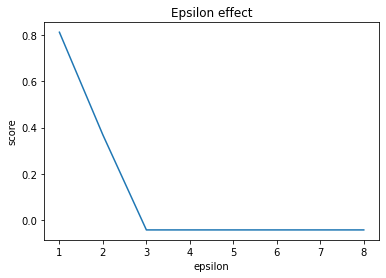

In [5]:
epsilons = np.arange(1, 9)
scores = []
for e in epsilons:
    model.set_params(epsilon=e)
    model.fit(X_train, y_train)
    scores.append(model.score(X_test, y_test))
plt.plot(epsilons, scores)
plt.title("Epsilon effect")
plt.xlabel("epsilon")
plt.ylabel("score")
plt.show()


In [6]:
y_pred = model.predict(X_test)

In [7]:
from sklearn import metrics
print("MAPE",metrics.mean_squared_error(y_test, y_pred))
print("RMES",np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


MAPE 0.645
RMES 0.8031189202104505
